In [44]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
df=pd.read_csv("Social_Network_Ads.csv")
df.sample(5)

,Age,EstimatedSalary,Purchased
112,38,61000,0
239,53,143000,1
269,40,61000,0
281,35,61000,0
243,56,104000,1


In [76]:
X=df.iloc[:,0:2]
Y=df.iloc[:,-1]
from sklearn.model_selection import train_test_split
[X_test,X_train,Y_test,Y_train]=train_test_split(X,Y)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train) #fit the scaler to the training data it will learn the parameters 
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)
np.round(X_train.describe(),1) #for rounding off the values 
np.round(X_test_scaled.describe(),1)

,Age,EstimatedSalary
count,300.0,300.0
mean,-0.0,-0.1
std,1.0,1.0
min,-1.9,-1.7
25%,-0.7,-0.8
50%,-0.1,-0.2
75%,0.7,0.5
max,2.1,2.3


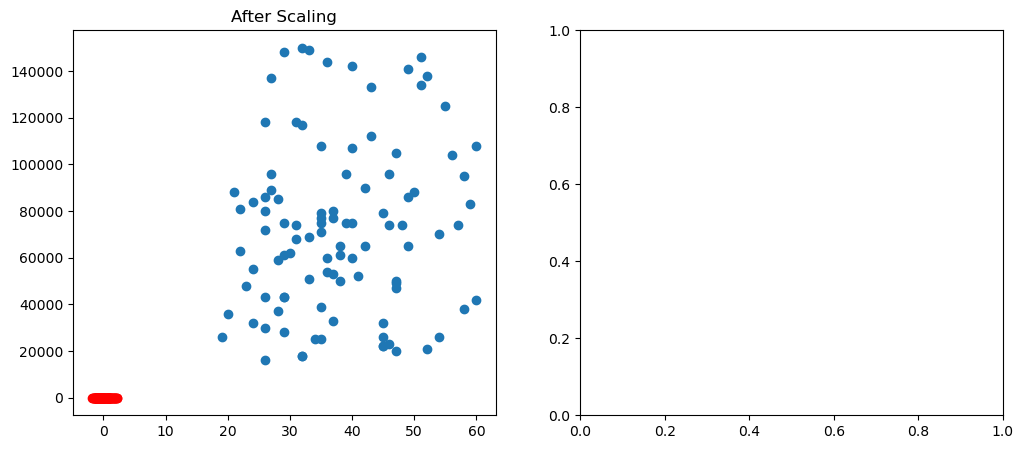

In [60]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(X_train["Age"],X_train["EstimatedSalary"])
ax1.set_title("Before Scaling")
ax1.scatter(X_train_scaled["Age"],X_train_scaled["EstimatedSalary"],color="red")
ax1.set_title("After Scaling")
plt.show()

In [70]:
from sklearn.linear_model import LogisticRegression
lin=LogisticRegression()
lin_scaled=LogisticRegression()
lin.fit(X_train,Y_train)
lin_scaled.fit(X_train_scaled,Y_train)
Y_pred=lin.predict(X_test)
Y_pred_scaled=lin_scaled.predict(X_test_scaled)
from sklearn.metrics import accuracy_score
print("Actual",accuracy_score(Y_test,Y_pred))
print("Scaled",accuracy_score(Y_test,Y_pred_scaled))

Actual 0.86
Scaled 0.8566666666666667


In [82]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree_scaled=DecisionTreeClassifier()
tree.fit(X_train,Y_train)
tree_scaled.fit(X_train_scaled,Y_train)
Y_pred=tree.predict(X_test)
Y_pred_scaled=tree_scaled.predict(X_test_scaled)
from sklearn.metrics import accuracy_score
print("Actual",accuracy_score(Y_test,Y_pred))
print("Scaled",accuracy_score(Y_test,Y_pred_scaled))

Actual 0.8466666666666667
Scaled 0.8533333333333334


<h2>Effect of Outliers<?h2>

In [85]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [93]:
# Assuming df is an existing DataFrame
new_data = pd.DataFrame({"Age": [5, 10, 40], 
                         "EstimatedSalary": [5000, 10000, 20000], 
                         "Purchased": [0, 1, 1]})

df = pd.concat([df, new_data], ignore_index=False)


In [95]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
401,10,10000,1
402,40,20000,1
0,5,5000,0
1,10,10000,1


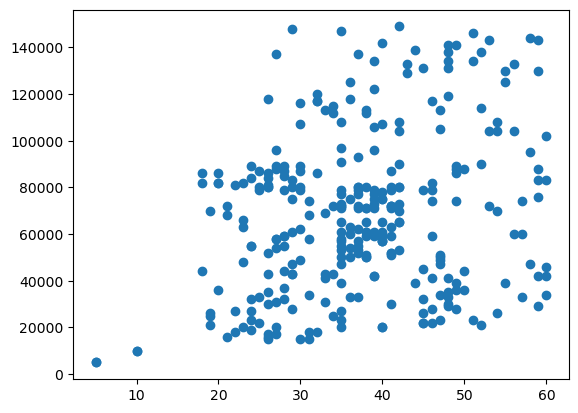

In [105]:
X=df.iloc[:,0:2]    #standardization doesnt handle the outliers,they are need to be managed explicitly
Y=df.iloc[:,-1]
[X_train,X_test,Y_train,Y_test]=train_test_split(X,Y)
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)
plt.scatter(X_train["Age"],X_train["EstimatedSalary"])
plt.scatter(X_train_scaled["Age"],X_train_scaled["EstimatedSalary"],color="red")